## 선형 분류 - 소프트맥스 회귀 (Softmax Regression)

 소프트맥스 회귀(softmax regression)는 로지스틱 회귀의 일반화된 형태로, 다중 클래스 분류 문제에서 사용되는 알고리즘입니다. 목적은 각 클래스에 대한 확률을 출력하는 것입니다.
 
 소프트맥스 회귀는 입력 변수(x)와 출력 변수(y) 사이의 선형 관계를 모델링하며, 선형 회귀와 유사한 방법을 사용합니다. 다만, 선형 회귀는 예측값을 연속적인 값으로 출력하는 반면, 소프트맥스 회귀는 각 클래스에 대 한 확률 값을 출력합니다.
 
 모델은 입력 변수(x)와 가중치(w)의 곱의 합에 편향(b)을 더한 값에 대해 소프트맥스 함수를 적용합니다. 소프트맥스 함수는 각 클래스에 대한 확률값을 출력하기 위해 모델의 출력값을 0과1 사이의 값으로 변환합니다. 이렇게 변환된 값은 모든 클래스의 출력 값 합이 1이 되도록 정규화됩니다. 따라서, 각 클래스에 대한 확률 값은 소프트맥스 함수의 출력 값으로 계산됩니다.
 
 소프트맥스 회귀는 다중 클래스 분류 문제에서 효과적으로 사용됩니다. 예를 들어, 손글씨 숫자 인식 문제에서 입력 이미지를 분류하는데 사용될 수 있습니다.

### 소프트맥스 회귀 활성화 함수 - 소프트맥스 함수

소프트맥스 함수(softmax function)는 로지스틱 함수를 일반화한 함수입니다. 로지스틱 회귀에서는 이항 분류 문제를 해결하기 위해 시그모이드 함수를 사용했습니다. 소프트맥스 회귀에서는 이러한 이항 분류 문제를 다중 클래스 분류 문제로 일반화하여 해결합니다.

소프트맥스 함수는 다중 클래스 분류에서 각 클래스에 대한 확률값을 계산하기 위해 사용됩니다.
이 함수는 각 클래스에 대한 지수 함수를 계산하고, 이들의 총합으로 각 클래스의 확률을 나누어 계산합니다. 즉, 소프트맥스 함수는 입력된 벡터를 각 클래스에 대한 확률 분포로 변환해주는 함수입니다.

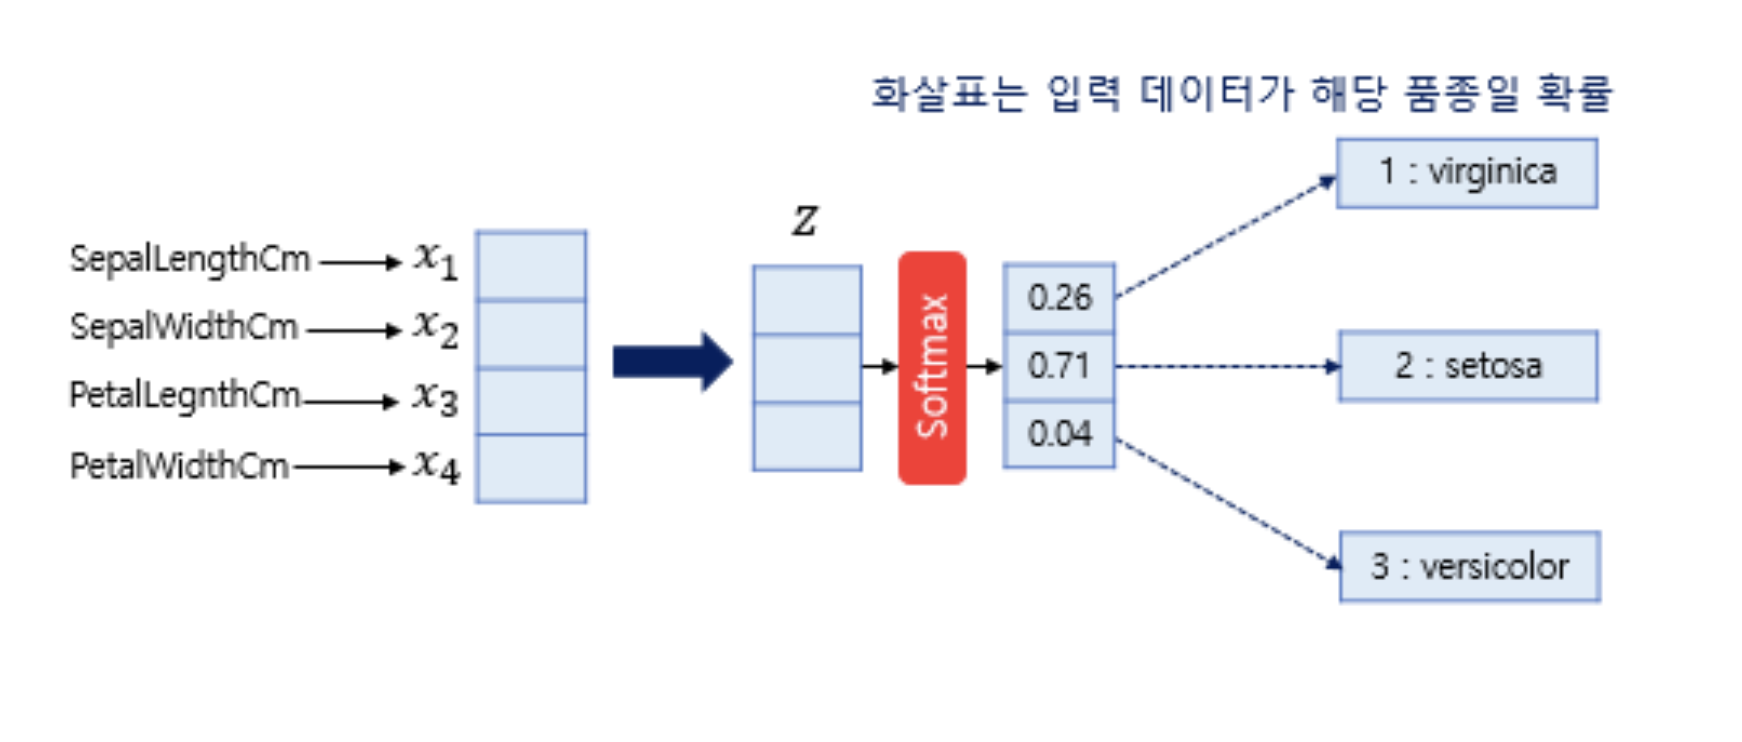

소프트맥스 함수의 이점 중 하나는 각 클래스에 대한 확률값이 항상 0과1 사이의 값으로 나오며,이들의 총합은 1이 된다는 점입니다. 이는 다중 클래스 분류 문제에서 각 클래스에 대한 예측 확률을 쉽게 해석할 수 있도록 해줍니다.또한, 소프트맥스 함수는 출력값이 확률 분포를 따르기 때문에, 분류 모델에서 정확도를 최적화하는 목적 함수로 사용됩니다

### 소프트맥스 회귀 손실 함수 - 교차 엔트로피(Cross-Entropy)

소프트맥스 회귀에서 사용하는 비용 함수는 크로스 엔트로피(Cross-Entropy) 함수입니다. 이 비용 함수는 모델의 예측값과 실제값 사이의 차이를 측정하여 모델의 성능을 평가하는데 사용됩니다.

크로스 엔트로피 함수는 실제값과 예측값의 분포를 비교하여 예측값이 실제값과 일치하도록 학습하는 것을 목적으로 합니다. 이 함수의 값이 작을수록 모델의 예측이 실제값과 가까워집니다.

소프트맥스 회귀에서는 다중 클래스 분류 문제를 해결하는데 사용됩니다. 따라서 비용 함수를 이용하여 예측값과 실제값 사이의 오차를 최소화하는 것이 학습의 목적입니다. 이를 위해 활성화 함수로는 소프트맥스 함수, 손실함수로는 크로스 엔트로피 함수를 사용합니다.


## *PyTorch를 사용하여 소프트맥스 회귀 모델을 학습하고 예측하기*
+ Iris 데이터셋 사용하여 진행


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 로드
iris = load_iris()
#print(iris)

x = iris.data
y = iris.target
print(x, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
# Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=777)

# Convert data to Pytorch tensor
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

print(y_test)

tensor([2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2])


In [4]:
# 데이터셋 데이터 로더 정의
train_dataset = TensorDataset(x_train, y_train)

# TensorDataset() -> 동일한 크기를 가진 텐서들을 첫번째 차원을 기준으로 결합해서 -> 데이터셋 생성
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [5]:
# 모델 구현
class SoftmaxRegression(nn.Module) :
    def __init__(self, input_size, num_classes) :
        #모델 인스턴스
        super(SoftmaxRegression, self).__init__()
        #모델 내 계층
        self.linear = nn.Linear(input_size, num_classes)
        
        #지금 모델이 단일 계층으로 이루어져있는데 디폴트 값으로 SoftmaxRegression에서는 마지막에 Sigmoid 계층을 처리해준다.
    def forward(self, x) :
        out = self.linear(x)
    
        return out

In [6]:
# 하이퍼파라미터 설정
input_size = 4
num_classes = 3
lr = 0.01
num_epochs = 100

# 옵티마이저 loss 함수 모델
model = SoftmaxRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
# model.parameters()는 모델의 학습 가능한 가중치를 가져옵니다.

# Train the model
total_Step = len(train_loader)
for epoch in range(num_epochs) :
    for i, (inputs, labels) in enumerate(train_loader) :
        #Forward pass
        output = model(inputs)
        loss = criterion(output, labels)
        
        #Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #print
        if (i+1) % 10 == 0 :
            print("Epoch [{}/{}], Step [{}/{}], Loss : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_Step, loss.item()
            ))

Epoch [1/100], Step [10/14], Loss : 3.1920
Epoch [2/100], Step [10/14], Loss : 1.2352
Epoch [3/100], Step [10/14], Loss : 0.9019
Epoch [4/100], Step [10/14], Loss : 0.8974
Epoch [5/100], Step [10/14], Loss : 0.7315
Epoch [6/100], Step [10/14], Loss : 0.7238
Epoch [7/100], Step [10/14], Loss : 0.8274
Epoch [8/100], Step [10/14], Loss : 0.5892
Epoch [9/100], Step [10/14], Loss : 0.8680
Epoch [10/100], Step [10/14], Loss : 0.7630
Epoch [11/100], Step [10/14], Loss : 0.6398
Epoch [12/100], Step [10/14], Loss : 0.7105
Epoch [13/100], Step [10/14], Loss : 0.5847
Epoch [14/100], Step [10/14], Loss : 0.5379
Epoch [15/100], Step [10/14], Loss : 0.6528
Epoch [16/100], Step [10/14], Loss : 0.6041
Epoch [17/100], Step [10/14], Loss : 0.4326
Epoch [18/100], Step [10/14], Loss : 0.5252
Epoch [19/100], Step [10/14], Loss : 0.5963
Epoch [20/100], Step [10/14], Loss : 0.4594
Epoch [21/100], Step [10/14], Loss : 0.4470
Epoch [22/100], Step [10/14], Loss : 0.5924
Epoch [23/100], Step [10/14], Loss : 0.61

In [7]:
# 모델 평가(x_test데이터로 평가한다.)
model.eval()
with torch.no_grad() :
    outputs = model(x_test)
    _, predicted = torch.max(outputs.data, 1)
    acc = (predicted == y_test).sum().item() / len(y_test)
    print("Test ACC >> {:.2f}%".format(acc * 100))

Test ACC >> 100.00%


## *결정 경계와 데이터 포인트 시각화*
+ Softmax Regression 모델이 학습한 결정 경계와 데이터 포인트 시각화

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [9]:
#데이터 생성
x, y = make_blobs(n_samples=10000, centers=3, n_features=2, random_state=77)
"""
n_samples: 생성할 데이터 포인트의 총 개수입니다.
centers: 클러스터의 개수입니다. 각 클러스터는 데이터의 다른 영역을 대표합니다.
n_features: 각 데이터 포인트의 특성(차원) 개수입니다. 예를 들어, 2차원 데이터를 생성하려면 n_features=2로 설정합니다.
"""
x = torch.from_numpy(x).float()
y = torch.from_numpy(y)
print(x, y)

tensor([[ 7.2824,  1.7754],
        [ 6.0631, -7.8609],
        [ 7.7911,  2.4228],
        ...,
        [ 6.5061,  3.0601],
        [ 6.7236, -7.4060],
        [ 8.4117,  3.1252]]) tensor([0, 1, 0,  ..., 0, 1, 0])


In [10]:
# 모델 정의
class SoftmaxRegression(nn.Module) :
    def __init__(self, input_size, num_classes) :
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x) :
        out = self.linear(x)
        
        return out
    
model = SoftmaxRegression(input_size=2, num_classes=3)

In [11]:
# Loss 함수 / 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
# Train loop
num_epochs = 1000
for epoch in range(num_epochs) :
    
    # Foward pass
    output = model(x)
    loss = criterion(output, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # print
    if (epoch+1) % 100 == 0 :
        print("Epoch [{}/{}], Loss : {:.4f}".format(
            epoch+1, num_epochs, loss.item()
        ))

Epoch [100/1000], Loss : 0.0356
Epoch [200/1000], Loss : 0.0157
Epoch [300/1000], Loss : 0.0103
Epoch [400/1000], Loss : 0.0078
Epoch [500/1000], Loss : 0.0063
Epoch [600/1000], Loss : 0.0053
Epoch [700/1000], Loss : 0.0046
Epoch [800/1000], Loss : 0.0041
Epoch [900/1000], Loss : 0.0037
Epoch [1000/1000], Loss : 0.0033


/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1682343685278/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


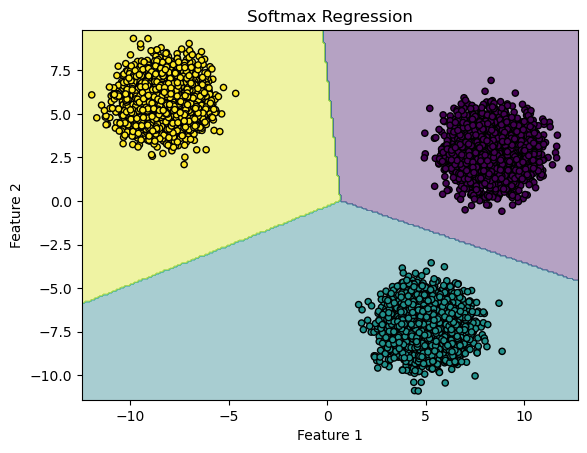

In [13]:
# 시각화
# Plot decision boundary
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 소프트맥스 회귀의 한계와 개선 방안 소개

+ 과적합(overfitting) 문제: 매개변수의 수가 많은 모델은 데이터를 잘 설명할 수 있지만, 일반화(generalization) 능력이 떨어지는 과적합 문제가 발생할 수 있습니다.
<br></br>

+ 클래스 수에 따른 모델 복잡도 증가: 클래스 수가 증가할수록 모델의 복잡도가 증가하여, 학습 데이터가 적을 때 모델의 성능이 저하될 수 있습니다.
<br></br>